In [168]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt



path = '/Users/BOWPJ/Desktop/NVTC'
os.chdir(path)


# Data from: https://catalog.data.gov/dataset/rural-veterans-by-state-e6abb
rural_urban = pd.read_excel('Rural_Veterans_by_State_2014.xlsx')

rural_urban = rural_urban[2:]
rural_urban = rural_urban.reset_index()

rural_urban.columns = ['state','vetpop_rural','vetpop_urban','perc_f_rural','perc_f_urban','unemp_vet_rural','unemp_vet_urban','bel_pov_inc_rural','bel_pov_inc_urban',
                       'disabil_rate_rural','disabil_rate_urban','med_inc_rural','med_inc_urban',
                       '18-34_rural','18-34_urban','35-54_rural','35-54_urban','55-64_rural','55-64_urban',
                       '65-74_rural','65-74_urban','75+_rural','75+_urban','gulf2_rural','gulf2_urban',
                       'gulf1_rural','gulf1_urban','vietnam_rural','vietnam_urban','korean_rural','korean_urban',
                       'world2_rural','world2_urban','less_highschool_rural','less_highschool_urban','highschool_rural',
                       'highschool_urban','some_college_rural','some_college_urban','bachelor_rural','bachelor_urban']
                      

rural_urban = rural_urban.replace('X',np.nan)
rural_urban = rural_urban[:52]


In [169]:
rural_urban.head()

,state,vetpop_rural,vetpop_urban,perc_f_rural,perc_f_urban,unemp_vet_rural,unemp_vet_urban,bel_pov_inc_rural,bel_pov_inc_urban,disabil_rate_rural,...,world2_rural,world2_urban,less_highschool_rural,less_highschool_urban,highschool_rural,highschool_urban,some_college_rural,some_college_urban,bachelor_rural,bachelor_urban
0,Alabama,142884.0,201420.0,7.6,9.0,4.0,6.5,8.5,8.8,36.0,...,3.4,4.7,10.1,5.3,35.2,24.6,37.1,39.0,17.6,31.1
1,Alaska,21470.0,48378.0,8.4,15.0,12.3,6.4,4.9,4.0,30.5,...,1.3,2.9,4.1,3.8,31.8,19.4,38.0,49.4,26.2,27.4
2,Arizona,62905.0,420121.0,7.0,8.3,5.3,7.0,8.4,7.4,34.4,...,4.1,5.8,6.2,5.2,23.2,22.1,43.2,42.8,27.4,29.9
3,Arkansas,101788.0,106098.0,6.3,9.6,4.2,7.6,9.1,8.1,38.7,...,5.2,4.2,11.1,7.2,38.6,28.7,36.1,37.2,14.2,26.9
4,California,142266.0,1551336.0,5.4,7.7,8.6,7.8,8.8,7.6,32.9,...,6.4,6.7,5.9,5.8,24.3,19.5,42.5,42.0,27.3,32.7


# Characteristics (%) of veterans in each state

In [196]:
# 2014 data from: https://www.census.gov/library/visualizations/2015/comm/veterans-statistics.html
characteristics = pd.read_excel('vet-state-characteristics.xlsx')
characteristics = characteristics.dropna(axis=1,thresh=20)
characteristics.columns = ['state','total_vet_pop','female','med_inc','gulf2','gulf1','vietnam','korean','world2','peace','bachelor','enrolled',
                          'uninsured','disabil','VA','18-29','30-44','45-54','55-64','65+','-10k','10k-14.9k','15k-24.9k','25k-34.9k',
                          '35k-49.9k','50k-74.9','75k-99.9k','100k-149.9k','150k-199.9k','200k+']

characteristics = characteristics.iloc[2:55]
characteristics = characteristics.iloc[1:]
characteristics.index = range(0,len(characteristics))
characteristics.head()


,state,total_vet_pop,female,med_inc,gulf2,gulf1,vietnam,korean,world2,peace,...,-10k,10k-14.9k,15k-24.9k,25k-34.9k,35k-49.9k,50k-74.9,75k-99.9k,100k-149.9k,150k-199.9k,200k+
0,Alabama,388865,7.6911,57935,13.4,14.6,33.6,8.9,5.7,23.8,...,3.5,3.6,8.9,10.7,15.8,21,14.3,14,4.7,3.6
1,Alaska,71004,12.7106,85518,24.2,17.8,30.8,4.2,2.5,20.5,...,1.7,2.4,4.6,5.8,10.1,17.7,16.8,22.8,11,7.1
2,Arizona,522382,7.69207,60197,11.5,12.1,33.6,11,7.3,24.5,...,3.36,3.03,8.2,10.07,15.44,21.44,14.47,15,5.15,3.83
3,Arkansas,237311,7.13915,50669,11.8,12.8,34.5,9.7,6.2,25,...,4.02,4.36,11.12,12.29,17.43,22.2,12.55,10.94,2.93,2.16
4,California,1893539,6.85257,73722,11.4,10.7,33.9,10.8,8.5,24.7,...,2.61,2.94,6.61,7.91,12.1,18.69,14.58,18.64,8.3,7.61


In [171]:
suicide_rate = pd.read_excel('suicide_rate.xlsx')
suicide_rate.head()

,state,total_vet,total_all,18-34_vet,18-34_all,35-54_vet,35-54_all,55-74_vet,55-74_all,75+_vet,75+_all
0,Alabama,37.8,18.8,86.1,16.1,45.7,22.3,29.3,18.0,28.7,16.7
1,Alaska,54.4,30.0,101.7,41.2,56.7,28.4,NaN,NaN,NaN,NaN
2,Arizona,53.6,23.7,76.8,19.7,74.5,24.9,42.4,25.9,48.3,25.9
3,Arkansas,48.1,22.0,116.4,20.1,50.9,25.6,40.5,21.6,35.4,15.8
4,California,39.1,14.0,47.1,10.0,45.0,14.3,32.3,16.5,42.3,21.6


## Characteristics + crude suicide rate for each state

In [172]:
# Adding suicide rate to characteristics data frame
characteristics['suicide_rate'] = suicide_rate['total_vet']
characteristics.tail()

,state,total_vet_pop,female,med_inc,gulf2,gulf1,vietnam,korean,world2,peace,...,10k-14.9k,15k-24.9k,25k-34.9k,35k-49.9k,50k-74.9,75k-99.9k,100k-149.9k,150k-199.9k,200k+,suicide_rate
47,Washington,582265,8.59111,67912,13,13.9,34.9,8.2,6.2,23.8,...,2.62,6.56,8.25,13.62,21.85,15.99,17.68,6.1,4.7,39.2
48,West Virginia,159448,5.17598,48786,8.8,11.2,36.4,10.6,7.1,25.9,...,4.27,11.91,13.56,18.01,21.74,12.01,10.22,2.61,1.99,49.0
49,Wisconsin,408870,6.35312,56311,8.6,10.1,34,11.2,8.8,27.3,...,3.11,9.26,11.23,17.05,22.99,14.9,12.82,3.41,2.32,36.1
50,Wyoming,50852,7.40187,62865,14.4,15,34.3,9.4,5.7,21.2,...,3.61,7.77,9.15,14.76,22.84,15.94,16.51,4.54,2.45,55.0
51,Puerto Rico,105823,4.3894,33338,11.2,7.6,29.1,21.6,4.8,25.8,...,9.34,19.65,15.2,17.17,16.13,7.6,4.92,0.89,0.98,14.8


### Correlation between each characteristic and crude suicide rate

In [173]:
cols = characteristics.columns.drop('state')
characteristics[cols] = characteristics[cols].apply(pd.to_numeric, errors='coerce')
characteristics_nostate = characteristics.drop('state',axis=1)
characteristics_nostate.corr()['suicide_rate'].sort_values(ascending=False)

suicide_rate     1.000000
uninsured        0.572600
50k-74.9         0.516602
55-64            0.516001
vietnam          0.460681
VA               0.395031
gulf1            0.363383
disabil          0.357463
30-44            0.332506
35k-49.9k        0.265868
18-29            0.251435
75k-99.9k        0.194078
female           0.153577
gulf2            0.148778
enrolled         0.148345
25k-34.9k        0.144697
45-54            0.055993
15k-24.9k        0.016018
10k-14.9k        0.015760
-10k            -0.057223
100k-149.9k     -0.163146
bachelor        -0.205426
med_inc         -0.208567
total_vet_pop   -0.266475
150k-199.9k     -0.276720
peace           -0.285262
world2          -0.355355
65+             -0.365545
200k+           -0.384025
korean          -0.407222
Name: suicide_rate, dtype: float64

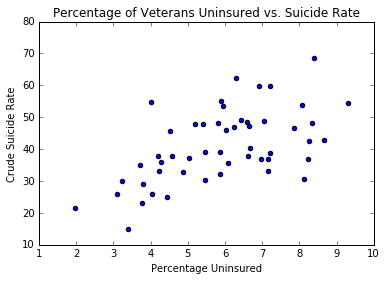

In [195]:
%matplotlib inline
import pylab

characteristics_nostate[['suicide_rate','uninsured']]

plt.scatter(characteristics_nostate['uninsured'],characteristics_nostate['suicide_rate'])
plt.title('Percentage of Veterans Uninsured vs. Suicide Rate')
plt.xlabel('Percentage Uninsured')
plt.ylabel('Crude Suicide Rate')
plt.show()

Notice: percentage of uninsured veterans is most highly correlated with suicide rate.

### Do states with more percentage of veterans in rural areas have more suicides?

In [179]:
cols = characteristics.columns.drop('state')
characteristics[cols] = characteristics[cols].apply(pd.to_numeric, errors='coerce')

rate_rural_urban = pd.DataFrame({'state':rural_urban['state'],'suicide_rate':suicide_rate['total_vet']})
rate_rural_urban['percent_rural'] = rural_urban['vetpop_rural']/characteristics['total_vet_pop']
rate_rural_urban['percent_urban'] = rural_urban['vetpop_urban']/characteristics['total_vet_pop']
rate_rural_urban[['suicide_rate','percent_rural','percent_urban']].corr()



,suicide_rate,percent_rural,percent_urban
suicide_rate,1.000000,0.431181,-0.359680
percent_rural,0.431181,1.000000,-0.967655
percent_urban,-0.359680,-0.967655,1.000000


### Which states have the highest percentage of veterans in rural areas?

In [180]:
# Reminder than suicide_rate is crude rate (per 100,000 people)
rate_rural_urban.sort_values(by='percent_rural',ascending=False).head(10)

,state,suicide_rate,percent_rural,percent_urban
19,Maine,48.3,0.600006,0.298419
45,Vermont,54.9,0.573613,0.328752
48,West Virginia,49.0,0.457315,0.425449
26,Montana,68.6,0.433191,0.461855
24,Mississippi,42.4,0.429210,0.440039
3,Arkansas,48.1,0.428922,0.447084
41,South Dakota,47.9,0.423755,0.499043
34,North Dakota,45.8,0.391839,0.552251
29,New Hampshire,37.2,0.390425,0.492207
17,Kentucky,48.6,0.375279,0.521204


In [181]:
rate_rural_urban.sort_values(by='suicide_rate',ascending=False).head(10)

,state,suicide_rate,percent_rural,percent_urban
26,Montana,68.6,0.433191,0.461855
44,Utah,62.4,0.099749,0.814072
31,New Mexico,59.8,0.206216,0.674155
28,Nevada,59.8,0.079672,0.857469
50,Wyoming,55.0,0.324392,0.568788
45,Vermont,54.9,0.573613,0.328752
1,Alaska,54.4,0.302377,0.681342
36,Oklahoma,53.8,0.327586,0.557861
2,Arizona,53.6,0.120420,0.804241
48,West Virginia,49.0,0.457315,0.425449


Notice: Montana has the highest suicide rate and one of the highest percentage of veterans in rural areas.
2014 suicides in Montana:
* Total suicides: 58
* Age 18-34: < 10
* Age 35-54: 21
* Age 55-74: 10-20
* Total Male: 50-60
* Total Female: <10

In [182]:
rate_rural_urban.sort_values(by='percent_urban',ascending=False).head(10)

,state,suicide_rate,percent_rural,percent_urban
8,District of Columbia,NaN,NaN,0.919233
11,Hawaii,30.0,0.070952,0.904595
28,Nevada,59.8,0.079672,0.857469
9,Florida,40.4,0.106930,0.824456
4,California,39.1,0.075132,0.819279
44,Utah,62.4,0.099749,0.814072
51,Puerto Rico,14.8,0.036117,0.811194
2,Arizona,53.6,0.120420,0.804241
39,Rhode Island,25.1,0.105960,0.796406
21,Massachusetts,21.6,0.094454,0.788602


Ranking (highest to lowest) for percentage of veterans living in urban areas.

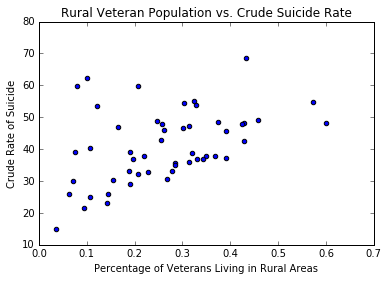

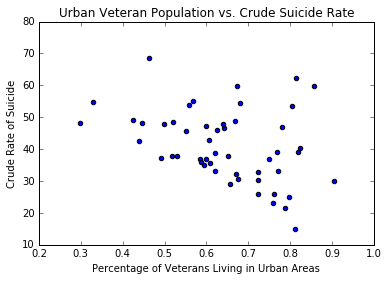

In [184]:
%matplotlib inline
import pylab
plt.scatter(rate_rural_urban['percent_rural'],rate_rural_urban['suicide_rate'])
plt.title('Rural Veteran Population vs. Crude Suicide Rate')
plt.xlabel('Percentage of Veterans Living in Rural Areas')
plt.ylabel('Crude Rate of Suicide')
pylab.savefig('rural.png')
plt.show()
plt.scatter(rate_rural_urban['percent_urban'],rate_rural_urban['suicide_rate'])
plt.title('Urban Veteran Population vs. Crude Suicide Rate')
plt.xlabel('Percentage of Veterans Living in Urban Areas')
plt.ylabel('Crude Rate of Suicide')
pylab.savefig('urban.png')
plt.show()


### Looking at other characteristics of veterans in states (excluding rural/urban population)

In [12]:
other_rural_char = rural_urban.drop(['vetpop_urban','vetpop_rural','state'],axis=1)
other_rural_char['suicide_rate'] = suicide_rate['total_all']
other_rural_char.corr()['suicide_rate'].sort_values(ascending=False).head(10)

suicide_rate          1.000000
some_college_urban    0.573722
some_college_rural    0.446220
disabil_rate_rural    0.403708
55-64_rural           0.394350
18-34_urban           0.378058
gulf1_urban           0.334110
35-54_urban           0.332889
55-64_urban           0.331035
perc_f_rural          0.320213
Name: suicide_rate, dtype: float64

Correlation between suicide rate in each state for veterans and characteristics of veterans in each state.

### Compare percentage of veteran suicide to general population

In [74]:
diff_all = []
suicide_rate1 = suicide_rate.dropna(subset=['total_vet','18-34_vet','35-54_vet','55-74_vet','75+_vet'],axis=0)
for index, row in suicide_rate1.iterrows():
    if row['total_all'] > row['total_vet']:
        print(row['state'])
    diff = row['total_vet']-row['total_all']
    diff_all.append(diff)
np.mean(diff_all)


21.957142857142859

On average (across all states), the suicide rates for veterans is 21.25% greater than the general population.

In [75]:
diff_1 = []
for index, row in suicide_rate1.iterrows():
    diff = row['18-34_vet']-row['18-34_all']
    diff_1.append(diff)

diff_2 = []
for index, row in suicide_rate1.iterrows():
    diff = row['35-54_vet']-row['35-54_all']
    diff_2.append(diff)
    
diff_3 = []
for index, row in suicide_rate1.iterrows():
    diff = row['55-74_vet']-row['55-74_all']
    diff_3.append(diff)

diff_4 = []
for index, row in suicide_rate1.iterrows():
    diff = row['75+_vet']-row['75+_all']
    diff_4.append(diff)
    
print(np.mean(diff_1))
print(np.mean(diff_2))
print(np.mean(diff_3))
print(np.mean(diff_4))

suicide_rate1.head()

62.4914285714
29.9285714286
12.9942857143
14.5914285714


,state,total_vet,total_all,18-34_vet,18-34_all,35-54_vet,35-54_all,55-74_vet,55-74_all,75+_vet,75+_all
0,Alabama,37.8,18.8,86.1,16.1,45.7,22.3,29.3,18.0,28.7,16.7
2,Arizona,53.6,23.7,76.8,19.7,74.5,24.9,42.4,25.9,48.3,25.9
3,Arkansas,48.1,22.0,116.4,20.1,50.9,25.6,40.5,21.6,35.4,15.8
4,California,39.1,14.0,47.1,10.0,45.0,14.3,32.3,16.5,42.3,21.6
5,Colorado,47.1,25.5,47.5,21.9,58.3,28.0,40.2,25.3,47.4,31.5


In [15]:
suicide_rate.head()

,state,total_vet,total_all,18-34_vet,18-34_all,35-54_vet,35-54_all,55-74_vet,55-74_all,75+_vet,75+_all
0,Alabama,37.8,18.8,86.1,16.1,45.7,22.3,29.3,18.0,28.7,16.7
1,Alaska,54.4,30.0,101.7,41.2,56.7,28.4,NaN,NaN,NaN,NaN
2,Arizona,53.6,23.7,76.8,19.7,74.5,24.9,42.4,25.9,48.3,25.9
3,Arkansas,48.1,22.0,116.4,20.1,50.9,25.6,40.5,21.6,35.4,15.8
4,California,39.1,14.0,47.1,10.0,45.0,14.3,32.3,16.5,42.3,21.6


Note: chi-squared test shows significant dependence between suicide rate and being veteran/nonveteran for all states

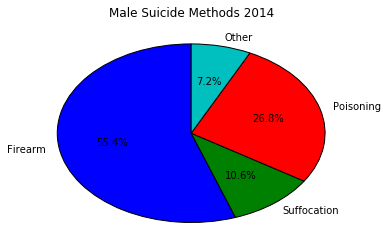

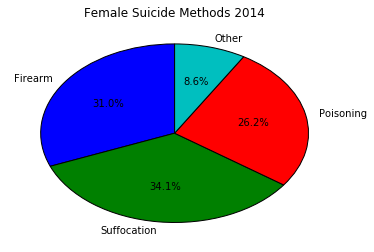

In [71]:
# suicide rates 2014
# All: Female: 1.5, Male: 2.6

labels = ['Firearm','Suffocation','Poisoning','Other']
f_number = [2999,3296,2533,833]
m_number = [18335,3513,8874,2391]

fig1, ax1= plt.subplots()
ax1.pie(m_number, labels=labels, startangle=90, autopct='%1.1f%%')
plt.title('Male Suicide Methods 2014')
plt.show()
fig2, ax2= plt.subplots()
ax2.pie(f_number, labels=labels, startangle=90, autopct='%1.1f%%')
plt.title('Female Suicide Methods 2014')
plt.show()

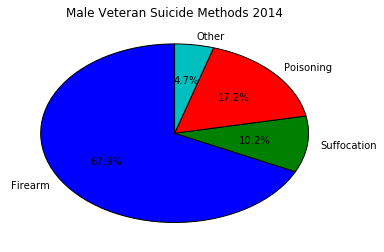

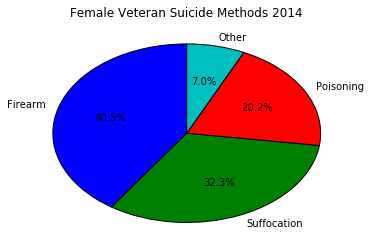

In [70]:
f_vets = [40.5,32.3,20.2,7]
m_vets = [67.9,10.2,17.2,4.7]

fig3, ax3= plt.subplots()
ax3.pie(m_vets, labels=labels, startangle=90, autopct='%1.1f%%')
plt.title('Male Veteran Suicide Methods 2014')
plt.show()
fig4, ax4= plt.subplots()
ax4.pie(f_vets, labels=labels, startangle=90, autopct='%1.1f%%')
plt.title('Female Veteran Suicide Methods 2014')
plt.show()

In [197]:
suicide_methods_all = [0.502,1-0.502] # Firearms, others

suicide_methods_veterans = pd.read_excel('Methods.xlsx')
for index, row in suicide_methods_veterans.iterrows():
    row['% by Firearm'] = pd.to_numeric(str(row['% by Firearm']).replace('%',''),errors='coerce')
    row['% by Suffocation'] = pd.to_numeric(str(row['% by Suffocation']).replace('%',''),errors='coerce')
    row['% by Poisoning'] = pd.to_numeric(str(row['% by Poisoning']).replace('%',''),errors='coerce')
suicide_methods_veterans = suicide_methods_veterans.dropna(subset=['% by Firearm'],axis=0,how='any')
suicide_methods_veterans['% by Firearm'] = pd.to_numeric(suicide_methods_veterans['% by Firearm'],errors='coerce')
suicide_methods_veterans.info()
suicide_methods_veterans.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 50
Data columns (total 7 columns):
State               43 non-null object
% by Firearm        42 non-null float64
% by Suffocation    39 non-null float64
% by Poisoning      32 non-null object
Other               30 non-null object
Total               43 non-null object
% by Firarm All     43 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.7+ KB


,State,% by Firearm,% by Suffocation,% by Poisoning,Other,Total,% by Firarm All
0,Alabama,0.808,0.108,0.085,NaN,1.001,0.676
2,Arizona,0.730,0.143,0.14,NaN,1.013,0.554
3,Arkansas,0.720,0.140,0.14,NaN,1,0.627
4,California,0.595,0.187,0.142,0.076,1,0.378
5,Colorado,0.669,0.180,0.152,NaN,1.001,0.500


In [62]:
diff_mean = np.mean(suicide_methods_veterans['% by Firearm']-suicide_methods_veterans['% by Firarm All'])
print(diff_mean)
suicide_methods_veterans[['% by Firearm','% by Firarm All']].head()
                    

0.14711904761904765


,% by Firearm,% by Firarm All
0,0.808,0.676
2,0.730,0.554
3,0.720,0.627
4,0.595,0.378
5,0.669,0.500


The average percentage of veterans using firearm for suicide is 14.7% higher than the percentage for the general population.

### Difference in means test for firearm use across states

In [67]:
# H0= mean veteran <= mean general
mean_firearm_vet = np.mean(suicide_methods_veterans['% by Firearm'])
mean_firearm_all = np.mean(suicide_methods_veterans['% by Firarm All'])
n_vet = len(suicide_methods_veterans['% by Firearm'])
n_all = len(suicide_methods_veterans['% by Firarm All'])
var_vet = suicide_methods_veterans['% by Firearm'].var()
var_all = suicide_methods_veterans['% by Firarm All'].var()
diff_firearm = mean_firearm_vet-mean_firearm_all

# Critical calues = 1.645
z_star = diff_firearm/(var_vet/n_vet+var_all/n_all)**(1/2)
z_star

0.6668333333333335
0.5193023255813954
0.08730041115950077
0.10775601516382606
43


z-score = 6.965 > critical value 1.645 -> reject null hypothesis in favor of alternative. The mean percentage of veterans using firearm as suicide methods across states is significantly greater than that of the general population (5% significance level).

## Total VA expenditure for each state 2014

In [107]:
expend = pd.read_excel('GDX_FY14.xlsx')
expend.columns = ['state','veteran_pop','total_expend','compensation_pension','construction','education','loyal_guarantee',
                  'op_expense','insurance','medical','unique_patients']
expend = expend.iloc[4:56]
#expend['suicide_rate'] = suicide_rate['suicide_rate']
for index, row in expend.iterrows():
    row['state'] = row['state'].split(' ')[0]
expend['suicide_rate'] = suicide_rate['suicide_rate']
expend.head()


KeyError: 'suicide_rate'

In [106]:
suicide_rate['state']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3